# Lane Detection


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from skimage.color import rgb2hsv, rgb2lab
from skimage.io import imread
from skimage.filters import sobel, threshold_yen, threshold_triangle
from skimage.transform import ProjectiveTransform, warp
from skimage.morphology import binary_closing, binary_erosion, thin, binary_dilation
from sklearn.cluster import KMeans

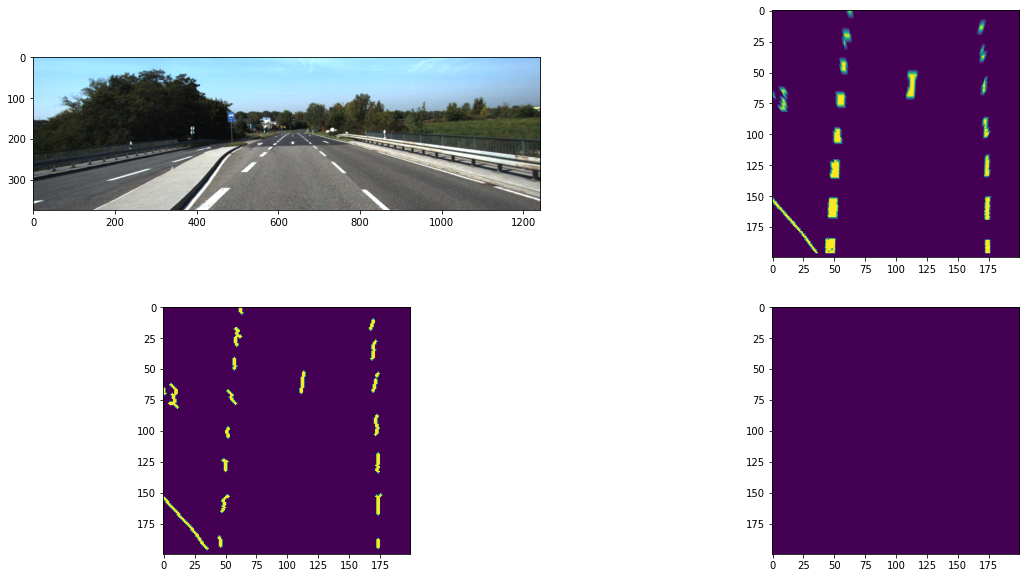

In [90]:
data_dir = 'data/training/image_2/'
cal_dir = 'data/training/calib/'

cal_src = np.array([[0, 0], [0, 200], [200, 200], [200, 0]])
cal_dst = np.array([[575, 200], [200, 400], [1000, 400], [680, 200]])

img = imread(data_dir + 'umm_000012.png')
img_lab = rgb2lab(img)
l = img_lab[:,:,0]
a = img_lab[:,:,1]
b = img_lab[:,:,2]

# Sobel filtering and Thresholding
l_sobel = sobel(l)
l_sobel_thresh = threshold_yen(l_sobel)
l_sobel[l_sobel < l_sobel_thresh] = 0

# Thresholding l
l_thresh = 95
l[l < l_thresh] = 0


# combining the two results
l_comb = l + l_sobel
l_comb[l_comb > 0] = 1
l_comb = l_comb.astype(int)


tform3 = ProjectiveTransform()
tform3.estimate(cal_src, cal_dst)
warped = warp(l, tform3, output_shape=(200, 200))
ero_warped = binary_erosion(warped)
thin_warped = binary_dilation(thin(ero_warped))

points = np.argwhere(thin_warped == 1)
km = KMeans(n_clusters=2).fit(points)
left_indices = np.argwhere(km.labels_ == 0)
right_indices = np.argwhere(km.labels_ == 1)


plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(thin_warped)
plt.subplot(224)
plt.imshow(left)

plt.show()